In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv', sep=';',decimal=',')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [4]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


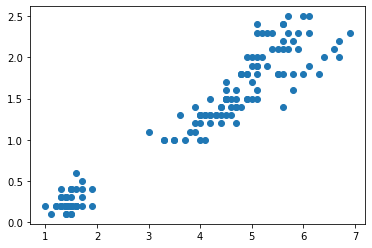

In [7]:
colx = 'petal length (cm)'
coly = 'petal width (cm)'


plt.scatter(df[colx], df[coly])
plt.show()

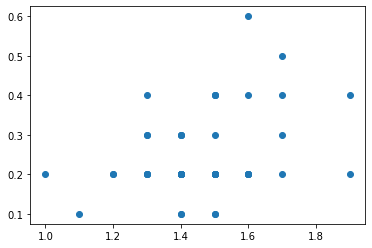

In [6]:
colx = 'petal length (cm)'
coly = 'petal width (cm)'

flag = df['target_names'] == 'setosa'
plt.scatter(df[flag][colx], df[flag][coly])
plt.show()

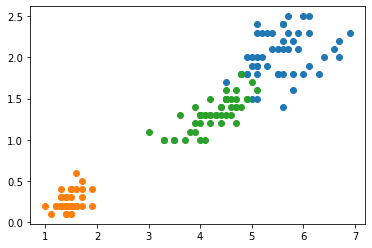

In [8]:
colx = 'petal length (cm)'
coly = 'petal width (cm)'

flag = df['target_names'] == 'virginica'
plt.scatter(df[flag][colx], df[flag][coly])

flag = df['target_names'] == 'setosa'
plt.scatter(df[flag][colx], df[flag][coly])

flag = df['target_names'] == 'versicolor'
plt.scatter(df[flag][colx], df[flag][coly])
plt.show()

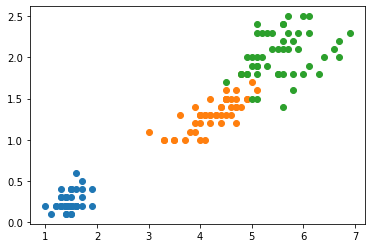

In [9]:
colx = 'petal length (cm)'
coly = 'petal width (cm)'

for i in df['target_names'].unique():
    flag = df['target_names'] == i
    plt.scatter(df[flag][colx], df[flag][coly])

plt.show()

## Markers

https://matplotlib.org/stable/api/markers_api.html

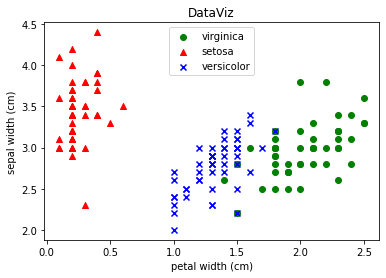

In [10]:
coly = 'sepal width (cm)'
colx = 'petal width (cm)'

flag = df['target_names'] == 'virginica'
plt.scatter(df[flag][colx], df[flag][coly], color = 'green', marker = 'o', label = 'virginica')

flag = df['target_names'] == 'setosa'
plt.scatter(df[flag][colx], df[flag][coly], color = 'red', marker = '^', label = 'setosa')

flag = df['target_names'] == 'versicolor'
plt.scatter(df[flag][colx], df[flag][coly], color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel(colx)
plt.ylabel(coly)
plt.legend(loc = 'upper center')
plt.title('DataViz')
#plt.grid()

plt.show()

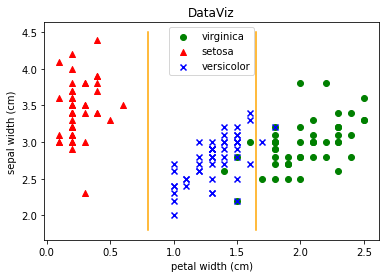

In [11]:
## separei a iris com traço de forma visual

coly = 'sepal width (cm)'
colx = 'petal width (cm)'

flag = df['target_names'] == 'virginica'
plt.scatter(df[flag][colx], df[flag][coly], color = 'green', marker = 'o', label = 'virginica')

flag = df['target_names'] == 'setosa'
plt.scatter(df[flag][colx], df[flag][coly], color = 'red', marker = '^', label = 'setosa')

flag = df['target_names'] == 'versicolor'
plt.scatter(df[flag][colx], df[flag][coly], color = 'blue', marker = 'x', label = 'versicolor')

eixox = [0.8, 0.8]
eixoy = [1.8,4.5]
plt.plot(eixox, eixoy, color = 'orange')

eixox = [1.65,1.65]
eixoy = [1.8,4.5]
plt.plot(eixox, eixoy, color = 'orange')

plt.xlabel(colx)
plt.ylabel(coly)
plt.legend(loc = 'upper center')
plt.title('DataViz')
#plt.grid()

plt.show()

In [12]:
## testar o modelo e tem 96% de acerto 

df['classification'] = ['no_label']*df.shape[0]

df.loc[df['petal width (cm)']<0.8,'classification'] = 'setosa'
df.loc[(df['petal width (cm)']>=0.8)&(df['petal width (cm)']<1.65),'classification'] = 'versicolor'
df.loc[df['petal width (cm)']>=1.65,'classification'] = 'virginica'

sum(df['target_names'] == df['classification'])/df.shape[0]

0.96

## Subplot

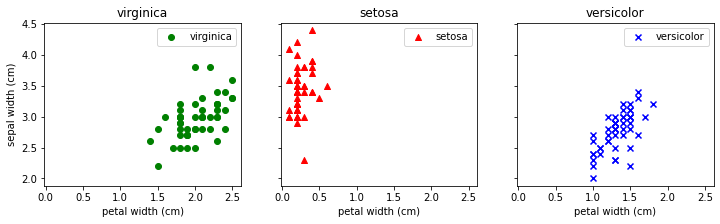

In [13]:
coly = 'sepal width (cm)'
colx = 'petal width (cm)'

fig, [ax0,ax1,ax2] = plt.subplots(nrows=1, ncols = 3, figsize = (12,3), sharey = True, sharex = True)


flag = df['target_names'] == 'virginica'
ax0.scatter(df[flag][colx], df[flag][coly], color = 'green', marker = 'o', label = 'virginica')
ax0.legend()
ax0.set_xlabel(colx)
ax0.set_ylabel(coly)
ax0.set_title('virginica')

flag = df['target_names'] == 'setosa'
ax1.scatter(df[flag][colx], df[flag][coly], color = 'red', marker = '^', label = 'setosa')
ax1.legend()
ax1.set_xlabel(colx)
ax1.set_title('setosa')

flag = df['target_names'] == 'versicolor'
ax2.scatter(df[flag][colx], df[flag][coly], color = 'blue', marker = 'x', label = 'versicolor')
ax2.legend()
ax2.set_xlabel(colx)
ax2.set_title('versicolor')

plt.show()

In [14]:
def plot_graph(df, colx, coly):
    fig, [ax0,ax1,ax2] = plt.subplots(nrows=1, ncols = 3, figsize = (12,3), sharey = True, 
                                      sharex = True)


    flag = df['target_names'] == 'virginica'
    ax0.scatter(df[flag][colx], df[flag][coly], color = 'green', marker = 'o', label = 'virginica')
    ax0.legend()
    ax0.set_xlabel(colx)
    ax0.set_ylabel(coly)
    ax0.set_title('virginica')

    flag = df['target_names'] == 'setosa'
    ax1.scatter(df[flag][colx], df[flag][coly], color = 'red', marker = '^', label = 'setosa')
    ax1.legend()
    ax1.set_xlabel(colx)
    ax1.set_title('setosa')

    flag = df['target_names'] == 'versicolor'
    ax2.scatter(df[flag][colx], df[flag][coly], color = 'blue', marker = 'x', label = 'versicolor')
    ax2.legend()
    ax2.set_xlabel(colx)
    ax2.set_title('versicolor')
    plt.show()

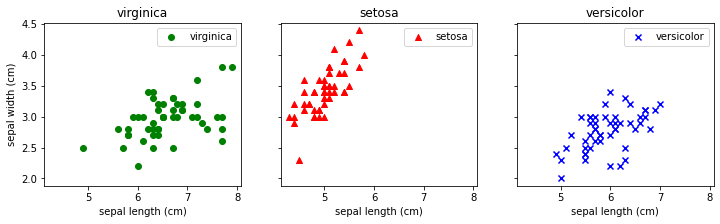

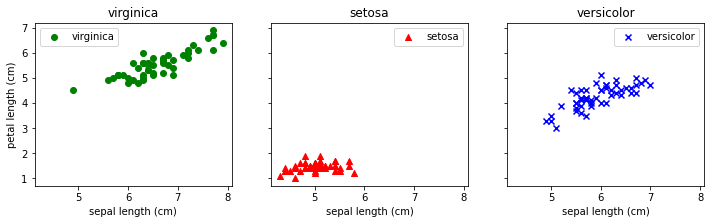

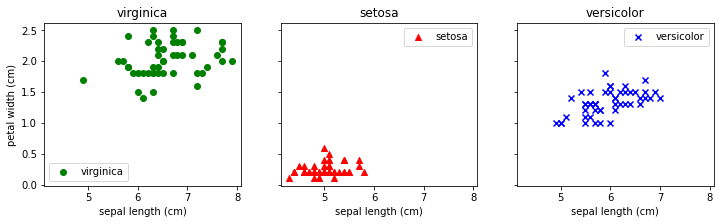

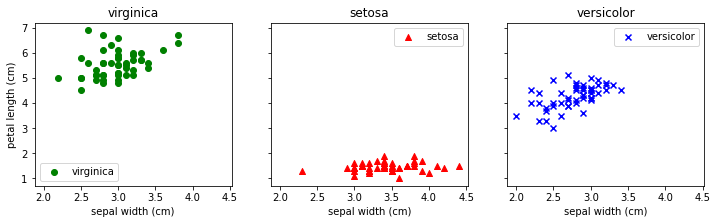

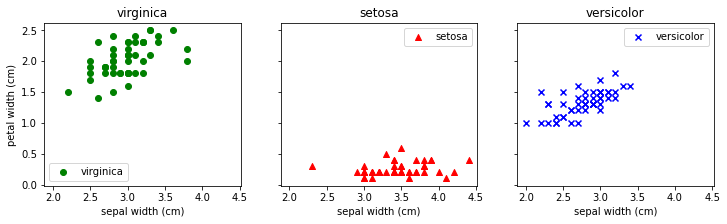

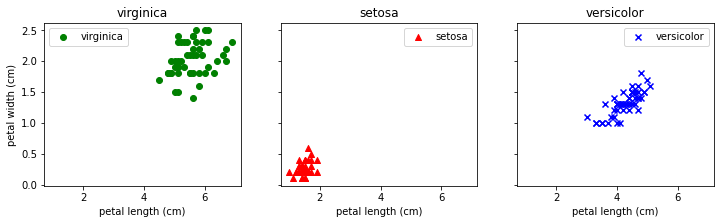

In [15]:
## plotando graficos para analisar o melhor

coly = 'sepal width (cm)'
colx = 'petal width (cm)'

cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        plot_graph(df, colx = cols[i], coly = cols[j])

In [16]:
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

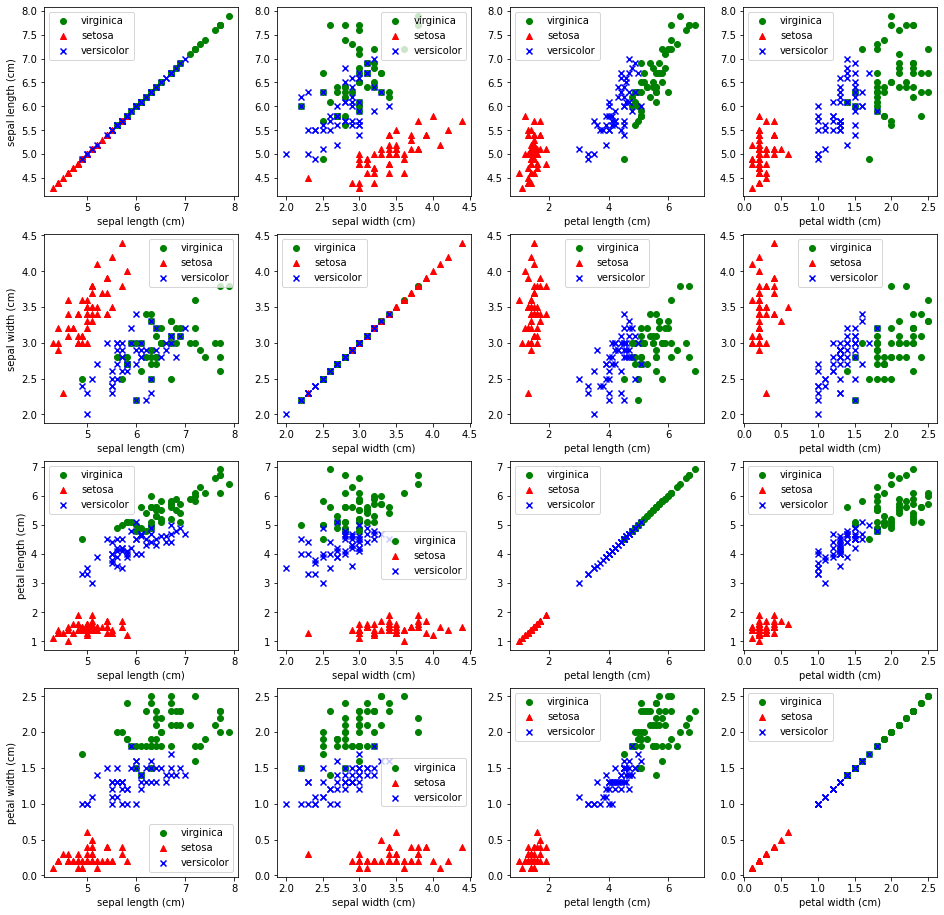

In [17]:
fig, ax = plt.subplots(nrows=len(cols), ncols=len(cols), figsize=(16,16)) ## figsize tamanho da figura

for i in range(len(cols)):
    for j in range(len(cols)):
        flag = df['target_names'] == 'virginica'
        ax[i][j].scatter(df[flag][cols[j]], df[flag][cols[i]], color = 'green', marker = 'o', 
                      label = 'virginica')

        flag = df['target_names'] == 'setosa'
        ax[i][j].scatter(df[flag][cols[j]], df[flag][cols[i]], color = 'red', marker = '^', 
                      label = 'setosa')

        flag = df['target_names'] == 'versicolor'
        ax[i][j].scatter(df[flag][cols[j]], df[flag][cols[i]], color = 'blue', marker = 'x', 
                      label = 'versicolor')

        ax[i][j].legend()
        ax[i][j].set_xlabel(cols[j])
    ax[i][0].set_ylabel(cols[i])

plt.show()

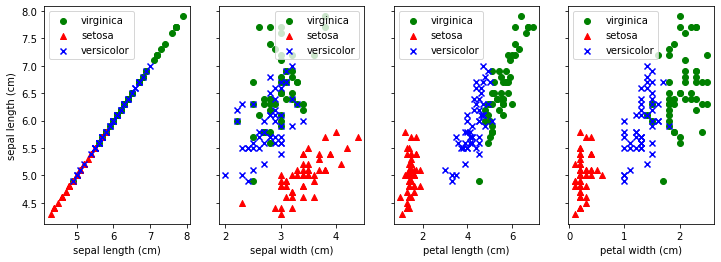

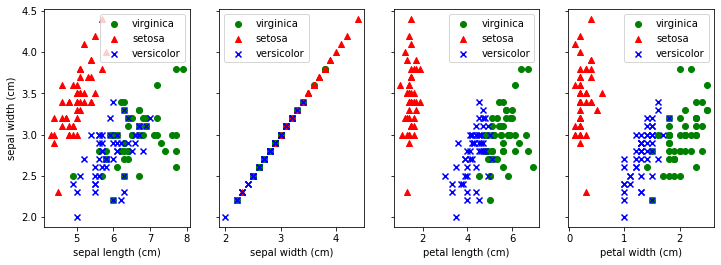

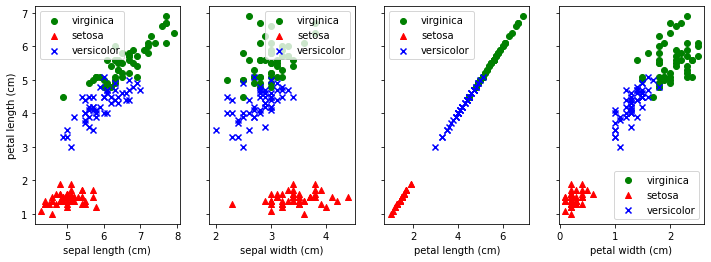

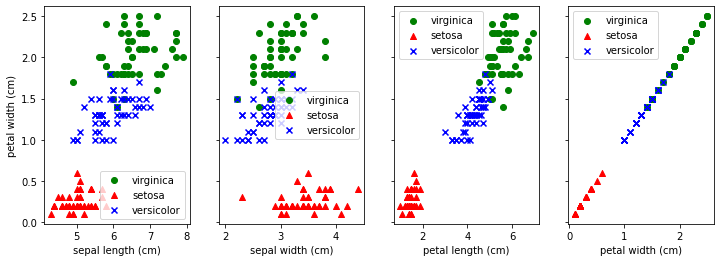

In [20]:
for i in range(len(cols)):
    fig, ax = plt.subplots(nrows=1, ncols=len(cols), figsize=(12,4), sharey = True)
    for j in range(len(cols)):
        flag = df['target_names'] == 'virginica'
        ax[j].scatter(df[flag][cols[j]], df[flag][cols[i]], color = 'green', marker = 'o', 
                      label = 'virginica')

        flag = df['target_names'] == 'setosa'
        ax[j].scatter(df[flag][cols[j]], df[flag][cols[i]], color = 'red', marker = '^', 
                      label = 'setosa')

        flag = df['target_names'] == 'versicolor'
        ax[j].scatter(df[flag][cols[j]], df[flag][cols[i]], color = 'blue', marker = 'x', 
                      label = 'versicolor')

        ax[j].legend()
        ax[j].set_xlabel(cols[j])
    ax[0].set_ylabel(cols[i])

plt.show()

## Extra - Seaborn

In [21]:
import seaborn as sb

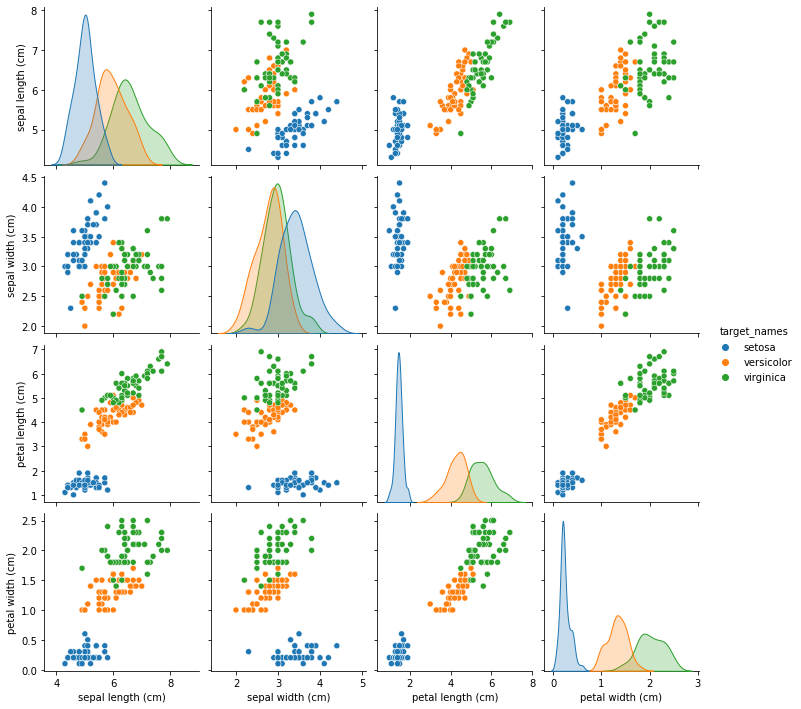

In [22]:
sb.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'
                , 'target_names']], hue = 'target_names')
plt.show()

## Sobreposiçaõ de gráficos

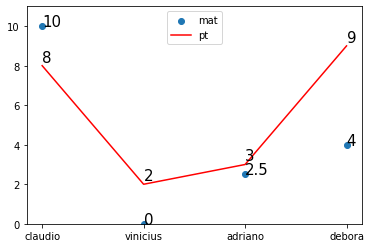

In [23]:
alunos = ['claudio', 'vinicius', 'adriano', 'debora']
mat = [10, 0, 2.5, 4]
pt = [8, 2, 3, 9]

fig, ax =plt.subplots(1,1)
ax.scatter(alunos, mat, label = 'mat')
ax.plot(alunos, pt, label = 'pt', color = 'red')
ax.legend(loc = 'upper center')
ax.set_ylim(0,11)

for i,j in zip(alunos,mat):
    ax.annotate(str(j),xy=(i,j), size=15)
    
for i,j in zip(alunos,pt):
    ax.annotate(str(j),xy=(i,j+.2), size=15)

plt.show()